In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Dataset.csv')
df.head()

,Unnamed: 0,product_name,review_title,comment,rating,date,username,profile_url,verified_purchase
0,20,PRETTYGARDEN Womens Casual Bodycon Pockets,Yes!!,I received so many compliments on this dress! ...,5.0 out of 5 stars,"February 9, 2023",Kedra,https://amazon.com//gp/profile/amzn1.account.A...,True
1,21,PRETTYGARDEN Womens Casual Bodycon Pockets,Beautiful dress,"I love this dress, wore it to an office and it...",5.0 out of 5 stars,"February 8, 2023",M. C. Miranda Leon,https://amazon.com//gp/profile/amzn1.account.A...,True
2,22,PRETTYGARDEN Womens Casual Bodycon Pockets,Great fitting,"It's very flattering, especially for girls wit...",5.0 out of 5 stars,"February 8, 2023",B Cast,https://amazon.com//gp/profile/amzn1.account.A...,True
3,23,PRETTYGARDEN Womens Casual Bodycon Pockets,Most comfortable dress ever,This fit in all of the right places. So flatt...,5.0 out of 5 stars,"February 7, 2023",Michele Smading,https://amazon.com//gp/profile/amzn1.account.A...,True
4,24,PRETTYGARDEN Womens Casual Bodycon Pockets,Love it,I love this dress so much I had to get it in r...,5.0 out of 5 stars,"February 5, 2023",Octavia Davis,https://amazon.com//gp/profile/amzn1.account.A...,True


In [ ]:
df.shape

(23910, 9)

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['date'], axis=1)

df.shape

(23910, 7)

In [ ]:
df['Rating'] = np.where(df['rating'] == '3.0 out of 5 stars', '3.0',
               np.where(df['rating'] == '1.0 out of 5 stars', '1.0',
               np.where(df['rating'] == '2.0 out of 5 stars', '2.0',
               np.where(df['rating'] == '4.0 out of 5 stars', '4.0',
               np.where(df['rating'] == '5.0 out of 5 stars', '5.0','none')))))

In [ ]:
#convert the rating from object to integer type
df = df.astype({'Rating':'float'})
print(df.dtypes)

product_name          object
review_title          object
comment               object
rating                object
username              object
profile_url           object
verified_purchase       bool
Rating               float64
dtype: object


In [ ]:
df['Rating'] = np.where((df['Rating']<3), 0, df.Rating)
df['Rating'] = np.where((df['Rating']>=3), 1, df.Rating)

In [ ]:
# #split data-set to train and test

X = df['comment']
y = df['Rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

In [ ]:
# to remove special characters and numbers from the comment
df['comment'] = df['comment'].str.replace('\W', '', regex=True)

In [ ]:
# to convert all reviews into lower case
df['comment'] = df['comment'].str.lower()

In [ ]:
df

,product_name,review_title,comment,rating,username,profile_url,verified_purchase,Rating
0,PRETTYGARDEN Womens Casual Bodycon Pockets,Yes!!,ireceivedsomanycomplimentsonthisdressfitswellm...,5.0 out of 5 stars,Kedra,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
1,PRETTYGARDEN Womens Casual Bodycon Pockets,Beautiful dress,ilovethisdressworeittoanofficeanditwasahititfi...,5.0 out of 5 stars,M. C. Miranda Leon,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
2,PRETTYGARDEN Womens Casual Bodycon Pockets,Great fitting,itsveryflatteringespeciallyforgirlswithcurvest...,5.0 out of 5 stars,B Cast,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
3,PRETTYGARDEN Womens Casual Bodycon Pockets,Most comfortable dress ever,thisfitinalloftherightplacessoflatteningthebes...,5.0 out of 5 stars,Michele Smading,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
4,PRETTYGARDEN Womens Casual Bodycon Pockets,Love it,ilovethisdresssomuchihadtogetitinredworeittomy...,5.0 out of 5 stars,Octavia Davis,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
...,...,...,...,...,...,...,...,...
23905,TOZO T6 Bluetooth Headphones Waterproof,Second time I've orderec,theseworkgreat,5.0 out of 5 stars,Lynn Maple,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
23906,TOZO T6 Bluetooth Headphones Waterproof,Excellent sound and long battery life,verynicequalitybeforeyoueventaketheheadphoneso...,5.0 out of 5 stars,Rick Dorsino,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
23907,TOZO T6 Bluetooth Headphones Waterproof,So so,whileilovetheseearbudsandthesoundtheyputoutand...,3.0 out of 5 stars,Abiah Crain,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0
23908,TOZO T6 Bluetooth Headphones Waterproof,I only have 2 complaints,theearbudsthemselvesworkgreattheyfitwellandthe...,4.0 out of 5 stars,Ashley Calloway,https://amazon.com//gp/profile/amzn1.account.A...,True,1.0


In [ ]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    removeStopWords(val)
    X_train_cleaned.append(val)

In [ ]:
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    removeStopWords(val)
    X_test_cleaned.append(val)

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of
# raw strings.
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

In [ ]:
X_train_tvec

<14346x14242 sparse matrix of type '<class 'numpy.float64'>'
	with 374812 stored elements in Compressed Sparse Row format>

Support Vector Classifier model

In [ ]:
# Support Vector Classifier model

svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train_tvec, Y_train)

LinearSVC(dual=False)

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0.0,0.820000,0.740000,0.780000,2596.000000
1.0,0.910000,0.940000,0.920000,6968.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.860000,0.840000,0.850000,9564.000000
weighted avg,0.880000,0.890000,0.880000,9564.000000


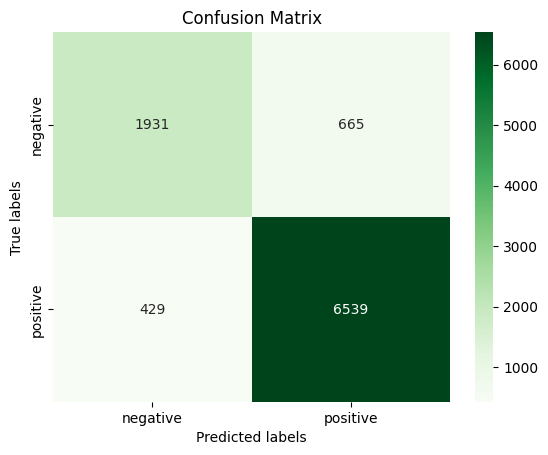

In [ ]:
# confusion matrix
svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a LinearSVC model
svr_lin = LinearSVC(multi_class='ovr', C=1.0, loss='squared_hinge', dual=False)

# Training time measurement
start_time_training = time.time()
svr_lin.fit(X_train_tvec, Y_train)
end_time_training = time.time()
training_time = end_time_training - start_time_training

# Prediction time measurement
start_time_prediction = time.time()
svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
end_time_prediction = time.time()
prediction_time = end_time_prediction - start_time_prediction

# Display training and prediction times
print("Training Time: {:.2f} seconds".format(training_time))
print("Prediction Time: {:.2f} seconds".format(prediction_time))

Training Time: 0.15 seconds
Prediction Time: 0.30 seconds


In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0.]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(svr_lin.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1.]


Random Forest model

In [ ]:
# Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tvec, Y_train)

RandomForestClassifier()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
ranfrst_predictions = random_forest.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0.0,0.860000,0.580000,0.690000,2596.000000
1.0,0.860000,0.970000,0.910000,6968.000000
accuracy,0.860000,0.860000,0.860000,0.860000
macro avg,0.860000,0.770000,0.800000,9564.000000
weighted avg,0.860000,0.860000,0.850000,9564.000000


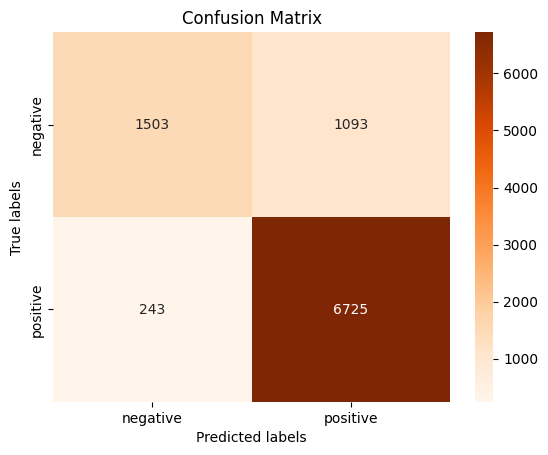

In [ ]:
# confusion matrix
ranfrst_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a Random Forest classifier
random_forest = RandomForestClassifier()

# Training time measurement
start_time_training = time.time()
random_forest.fit(X_train_tvec, Y_train)
end_time_training = time.time()
training_time = end_time_training - start_time_training

# Prediction time measurement
start_time_prediction = time.time()
ranfrst_predictions = random_forest.predict(tvec.transform(X_test_cleaned))
end_time_prediction = time.time()
prediction_time = end_time_prediction - start_time_prediction

# Display training and prediction times
print("Training Time: {:.2f} seconds".format(training_time))
print("Prediction Time: {:.2f} seconds".format(prediction_time))

Training Time: 16.09 seconds
Prediction Time: 0.72 seconds


In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Defective. Bad. Stopped working after one day use'])
demo_review_X_test = tvec.transform(demo_review)
print(random_forest.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0.]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Original Product. Great Performance.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(random_forest.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1.]


K-Nearest Neighbor model

In [ ]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_tvec, Y_train)

KNeighborsClassifier()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("gray", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0.0,0.830000,0.050000,0.100000,2596.000000
1.0,0.740000,1.000000,0.850000,6968.000000
accuracy,0.740000,0.740000,0.740000,0.740000
macro avg,0.780000,0.520000,0.470000,9564.000000
weighted avg,0.760000,0.740000,0.650000,9564.000000


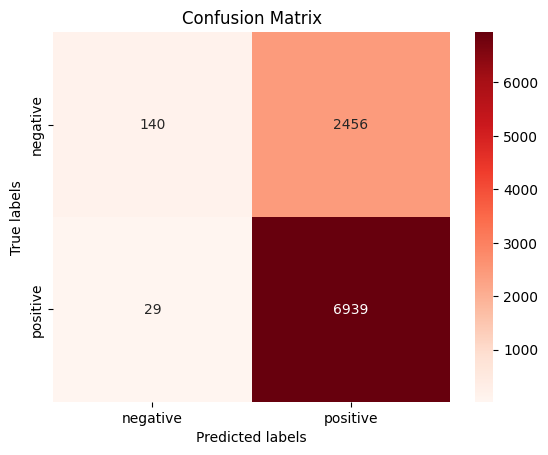

In [ ]:
# confusion matrix
knn_predictions=knn.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,knn_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a K-Nearest Neighbor classifier with 5 neighbors (you can adjust this parameter)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Training time measurement
start_time_training = time.time()
knn.fit(X_train_tvec, Y_train)
end_time_training = time.time()
training_time = end_time_training - start_time_training

# Prediction time measurement
start_time_prediction = time.time()
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
end_time_prediction = time.time()
prediction_time = end_time_prediction - start_time_prediction

# Display training and prediction times
print("Training Time: {:.2f} seconds".format(training_time))
print("Prediction Time: {:.2f} seconds".format(prediction_time))

Training Time: 0.01 seconds
Prediction Time: 102.34 seconds


In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Defective. Bad. Stopped working after one day use'])
demo_review_X_test = tvec.transform(demo_review)
print(knn.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[1.]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(knn.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1.]


Logistic regression model

In [ ]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

LogisticRegression()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0.0,0.850000,0.700000,0.770000,2596.000000
1.0,0.890000,0.950000,0.920000,6968.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.870000,0.830000,0.840000,9564.000000
weighted avg,0.880000,0.880000,0.880000,9564.000000


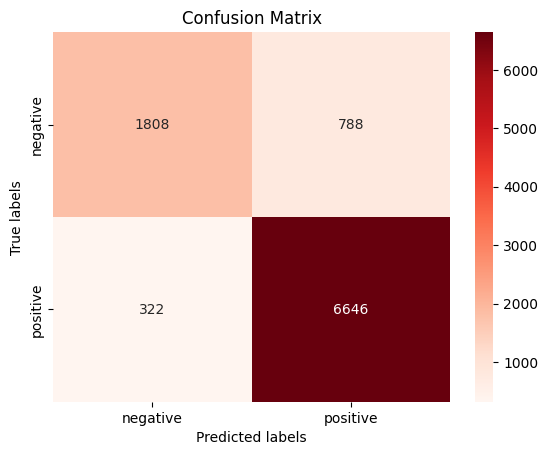

In [ ]:
# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a Logistic Regression classifier
lr = LogisticRegression()

# Training time measurement
start_time_training = time.time()
lr.fit(X_train_tvec, Y_train)
end_time_training = time.time()
training_time = end_time_training - start_time_training

# Prediction time measurement
start_time_prediction = time.time()
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
end_time_prediction = time.time()
prediction_time = end_time_prediction - start_time_prediction

# Display training and prediction times
print("Training Time: {:.2f} seconds".format(training_time))
print("Prediction Time: {:.2f} seconds".format(prediction_time))

Training Time: 0.36 seconds
Prediction Time: 0.32 seconds


In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Defective. Bad. Stopped working after one day use'])
demo_review_X_test = tvec.transform(demo_review)
print(lr.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0.]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Best product.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1.]


Naive Bayes model

In [ ]:
# Naive Bayes model
nbm = naive_bayes.MultinomialNB()
nbm.fit(X_train_tvec, Y_train)

MultinomialNB()

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
nbm_predictions = nbm.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,nbm_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("blue", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0.0,0.920000,0.370000,0.530000,2596.000000
1.0,0.810000,0.990000,0.890000,6968.000000
accuracy,0.820000,0.820000,0.820000,0.820000
macro avg,0.860000,0.680000,0.710000,9564.000000
weighted avg,0.840000,0.820000,0.790000,9564.000000


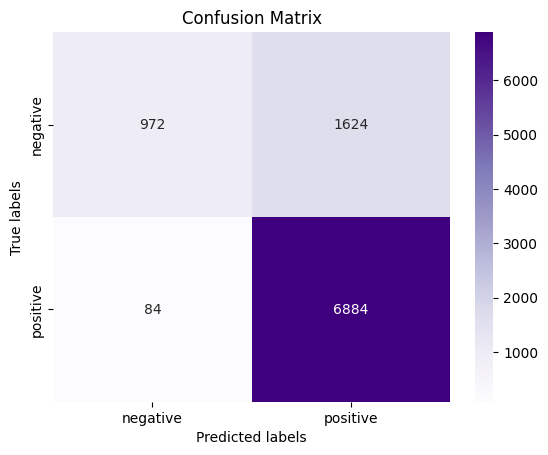

In [ ]:
# confusion matrix
nbm_predictions=nbm.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,nbm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a Multinomial Naive Bayes classifier
nbm = MultinomialNB()

# Training time measurement
start_time_training = time.time()
nbm.fit(X_train_tvec, Y_train)
end_time_training = time.time()
training_time = end_time_training - start_time_training

# Prediction time measurement
start_time_prediction = time.time()
nbm_predictions = nbm.predict(tvec.transform(X_test_cleaned))
end_time_prediction = time.time()
prediction_time = end_time_prediction - start_time_prediction

# Display training and prediction times
print("Training Time: {:.2f} seconds".format(training_time))
print("Prediction Time: {:.2f} seconds".format(prediction_time))

Training Time: 0.01 seconds
Prediction Time: 0.25 seconds


In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Defective. Bad. Stopped working after one day use'])
demo_review_X_test = tvec.transform(demo_review)
print(nbm.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0.]


In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Good product. highly recommend buying.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(nbm.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1.]
